In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import os
import shutil
from zipfile import ZipFile

In [ ]:
from google.colab import files
# Грузим файл kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavelkrinitsin","key":"94339e736d8f4f1aaf1e44d6170da42c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 804M/814M [00:10<00:00, 143MB/s]
100% 814M/814M [00:11<00:00, 77.3MB/s]


In [ ]:
!unzip dogs-vs-cats-redux-kernels-edition.zip

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
# Укажем путь к архиву и путь для распаковки
zip_file_path = '/content/test.zip'  # Путь к архиву
content_folder_path = '/content/data'  # Путь для распаковки

# Распаковка архива
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(content_folder_path)

In [ ]:
test_folder_path = '/content/data/test'
# Получим список файлов в папке
files_in_test_folder = os.listdir(test_folder_path)

# Отфильтруем файлы, оставляя только те, которые являются реальными файлами (а не подпапками)
filtered_files = [file for file in files_in_test_folder if os.path.isfile(os.path.join(test_folder_path, file))]

# Получим количество файлов
num_files_in_test = len(filtered_files)

# Выведем количество файлов
print(f"Количество файлов в папке test: {num_files_in_test}")

Количество файлов в папке test: 12500


In [ ]:
# Укажем путь к архиву и путь для распаковки
zip_file_path = '/content/train.zip'  # Путь к архиву
content_folder_path = '/content/data'  # Путь для распаковки

# Распаковка архива
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(content_folder_path)

In [ ]:
train_folder_path = '/content/data/train'
# Получим список файлов в папке
files_in_train_folder = os.listdir(train_folder_path)

# Отфильтруем файлы, оставляя только те, которые являются реальными файлами (а не подпапками)
filtered_files = [file for file in files_in_train_folder if os.path.isfile(os.path.join(train_folder_path, file))]

# Получим количество файлов
num_files_in_train = len(filtered_files)

# Выведем количество файлов
print(f"Количество файлов в папке train: {num_files_in_train}")

Количество файлов в папке train: 25000


Создаем фреймы данных

In [ ]:
# Путь к директории с изображениями test
test_directory = '/content/data/test'

# Получаем список файлов из папки
image_files = os.listdir(test_directory)

# Сортируем файлы как числа
image_files = sorted(image_files, key=lambda x: int(x.split('.')[0]))

# Создаем DataFrame
test_df = pd.DataFrame({'images': image_files})

# Выводим первые несколько строк для проверки
test_df.head()

,images
0,1.jpg
1,2.jpg
2,3.jpg
3,4.jpg
4,5.jpg


In [ ]:
import os

# Путь к директории с изображениями
image_directory = '/content/data/test'

# Преобразование имен файлов в полные пути
test_df['images'] = test_df['images'].apply(lambda x: os.path.join(image_directory, x))

# Проверим изменения
test_df.head()

,images
0,/content/data/test/1.jpg
1,/content/data/test/2.jpg
2,/content/data/test/3.jpg
3,/content/data/test/4.jpg
4,/content/data/test/5.jpg


In [ ]:
# Создаем список для хранения данных
data = []

# Пройдемся по всем файлам в папке
for file in os.listdir(train_folder_path):
    label = 0 if file.startswith('cat') else 1 if file.startswith('dog') else None

    # Игнорируем файлы, которые не являются изображениями cat или dog
    if label is not None:
        data.append({'images': file, 'label': label})

# Создаем датафрейм из списка данных
df_train1 = pd.DataFrame(data)

# Выведем первые несколько строк датафрейма
print(df_train1.head())

          images  label
0   dog.9370.jpg      1
1   dog.4417.jpg      1
2  dog.11472.jpg      1
3   cat.2524.jpg      0
4   dog.2725.jpg      1


In [ ]:
import os

# Путь к директории с изображениями
image_directory = '/content/data/train'

# Преобразуем имена файлов в полные пути
df_train1['images'] = df_train1['images'].apply(lambda x: os.path.join(image_directory, x))

# Проверим изменения
df_train1.head()

,images,label
0,/content/data/train/dog.9370.jpg,1
1,/content/data/train/dog.4417.jpg,1
2,/content/data/train/dog.11472.jpg,1
3,/content/data/train/cat.2524.jpg,0
4,/content/data/train/dog.2725.jpg,1


Выведем первые 10 изображений

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

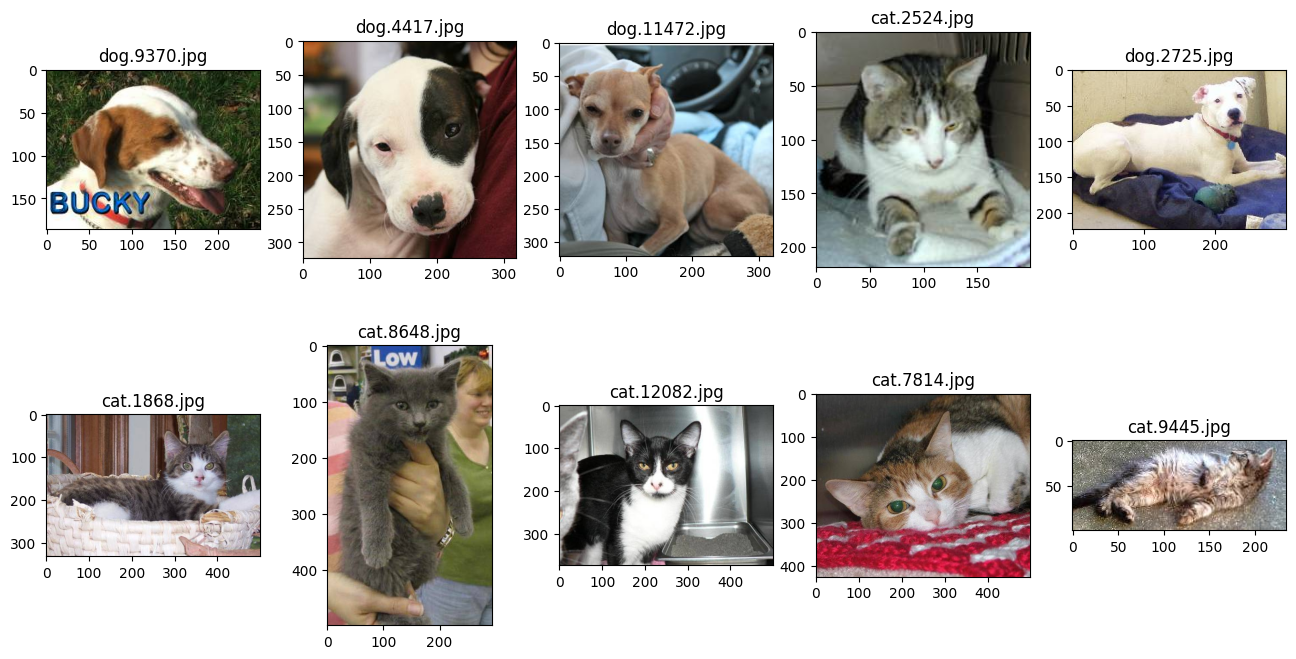

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

# Создаем фигуру для отображения изображений
fig = plt.figure(figsize=(16, 8))

# Выведем первые 10 изображений из датафрейма
for i, row in df_train1.head(10).iterrows():
    path = os.path.join(train_folder_path, row['images'])  # Используйте os.path.join для объединения путей

    # Загрузим изображение
    img = load_img(path)

    # Преобразуем изображение в массив NumPy
    img_array = np.array(img)

    # Добавим подграфик к фигуре
    subplot = fig.add_subplot(2, 5, i + 1)

    # Установим заголовок подграфика
    subplot.set_title('%s' % path.split('/')[-1])

    # Отобразим изображения
    plt.imshow(img_array)


Приведем формат метки к строке

In [ ]:
df_train1['label'] = df_train1['label'].astype(str)

Обучение модели

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_train1, test_size = 0.2, random_state = 42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)
val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
from keras.applications import vgg16

In [ ]:
base_model = vgg16.VGG16(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),  # Добавление слоя BatchNormalization
    Dropout(0.5),           # Добавление слоя Dropout
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
history = model.fit(train_iterator, epochs=30, validation_data=val_iterator)

Epoch 1/30
40/40 [==============================] - 265s 6s/step - loss: 0.7417 - accuracy: 0.5570 - val_loss: 2610.8860 - val_accuracy: 0.5092
Epoch 2/30
40/40 [==============================] - 146s 4s/step - loss: 0.6771 - accuracy: 0.6106 - val_loss: 5.9275 - val_accuracy: 0.4908
Epoch 3/30
40/40 [==============================] - 147s 4s/step - loss: 0.6159 - accuracy: 0.6852 - val_loss: 7.6186 - val_accuracy: 0.4908
Epoch 4/30
40/40 [==============================] - 147s 4s/step - loss: 0.5687 - accuracy: 0.7223 - val_loss: 115.7888 - val_accuracy: 0.5092
Epoch 5/30
40/40 [==============================] - 146s 4s/step - loss: 0.5687 - accuracy: 0.7232 - val_loss: 2.1314 - val_accuracy: 0.5348
Epoch 6/30
40/40 [==============================] - 147s 4s/step - loss: 0.5085 - accuracy: 0.7602 - val_loss: 4.8349 - val_accuracy: 0.5092
Epoch 7/30
40/40 [==============================] - 147s 4s/step - loss: 0.5191 - accuracy: 0.7612 - val_loss: 2.7729 - val_accuracy: 0.5092
Epoch 8/

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Создадим генератор данных для тестового датафрейма
test_data_generator = ImageDataGenerator(rescale=1./255)

# Используем правильные пути к изображениям
test_iterator = test_data_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',  # Название столбца с путями к изображениям
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # Задаем None, так как у нас нет меток
    shuffle=False  # Отключаем перемешивание
)



Found 12500 validated image filenames.


In [ ]:
# Получим предсказания на тестовом датасете
test_pred = model.predict(test_iterator, steps=len(test_iterator))



391/391 [==============================] - 61s 138ms/step


In [ ]:
with open('submit.txt', 'w') as dst:
    dst.write('id,Label\n')  # Заменяем 'ImageId' на 'id'
    for i, label in enumerate(test_pred, 1):
        dst.write('%s,%s\n' % (i, label[0]))

In [ ]:
!head submit.txt

id,Label
1,0.9968671
2,0.99908495
3,0.98240733
4,0.99842095
5,0.24613567
6,0.80905676
7,0.0059101526
8,0.024658266
9,0.017459286
